# Grad-CAM Inscribed DCA Notebook

This notebook is used to prove that the baseline network is using the DCA to predict the class.

## Imports

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')
import gradcam
import tensorflow as tf
import tensorflow.keras as keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Load in Models

Enter the paths to each model required.

In [2]:
# clean
base_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\clean\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.29.h5")

# bin
bin_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_binary\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.15.h5")

# real
real_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_realistic\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.30.h5")




# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\clean\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.29.h5
# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_binary\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.15.h5
# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_realistic\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.30.h5

## Load images

In [3]:

small_image_name = "ISIC2019_0053750_oth"
small_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\small\oth\ISIC2019_0053750_oth.jpg")
small_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB)

medium_image_name = "ISIC2019_0059744_oth"
medium_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\medium\oth\ISIC2019_0059744_oth.jpg")
medium_image = cv2.cvtColor(medium_image, cv2.COLOR_BGR2RGB)

large_image_name = "ISIC2019_0053821_oth"
large_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\large\oth\ISIC2019_0053821_oth.jpg")
large_image = cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB)

oth_image_name = "ISIC2019_0054508_oth"
oth_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\oth\oth\ISIC2019_0054508_oth.jpg")
oth_image = cv2.cvtColor(oth_image, cv2.COLOR_BGR2RGB)

# finish off clean images
small_image = small_image.astype('float32') / 255
small_image = np.expand_dims(small_image, axis=0)

medium_image = medium_image.astype('float32') / 255
medium_image = np.expand_dims(medium_image, axis=0)
                        
large_image = large_image.astype('float32') / 255
large_image = np.expand_dims(large_image, axis=0)

oth_image = oth_image.astype('float32') / 255
oth_image = np.expand_dims(oth_image, axis=0)

# large 1 - ISIC2019_0053821_oth.jpg
# large 2 - ISIC2019_0054304_oth.jpg
# large 3 - ISIC2019_0055495_oth.jpg
# large 4 - ISIC2019_0057233_oth.jpg
# large 5 - ISIC2019_0057493_oth.jpg
# large 6 - ISIC2019_0058606_oth.jpg
# large 7 - ISIC2019_0059418_oth.jpg

# medium 8 - ISIC2019_0053688_oth.jpg
# medium 9 - ISIC2019_0054077_oth.jpg
# medium 10 - ISIC2019_0055313_oth.jpg
# medium 11 - ISIC2019_0056383_oth.jpg
# medium 12 - ISIC2019_0056656_oth.jpg
# medium 13 - ISIC2019_0058686_oth.jpg
# medium 14 - ISIC2019_0059744_oth.jpg

# small 15 - ISIC2019_0000274_oth.jpg
# small 16 - ISIC2019_0027815_oth.jpg
# small 17 - ISIC2019_0029012_oth.jpg
# small 18 - ISIC2019_0029897_oth.jpg
# small 19 - ISIC2019_0032756_oth.jpg
# small 20 - ISIC2019_0053577_oth.jpg
# small 21 - ISIC2019_0053750_oth.jpg

# other 22 - ISIC2019_0000251_oth.jpg
# other 23 - ISIC2019_0000352_oth.jpg
# other 24 - ISIC2019_0054508_oth.jpg
# other 25 - ISIC2019_0056370_oth.jpg
# other 26 - ISIC2019_0064718_oth.jpg
# other 27 - ISIC2019_0066728_oth.jpg
# other 28 - ISIC2019_0069252_oth.jpg


## Generate Predictions

In [4]:
base_small_pred = base_model.predict(small_image)
base_medium_pred = base_model.predict(medium_image)
base_large_pred = base_model.predict(large_image)
base_oth_pred = base_model.predict(oth_image)

bin_small_pred = bin_model.predict(small_image)
bin_medium_pred = bin_model.predict(medium_image)
bin_large_pred = bin_model.predict(large_image)
bin_oth_pred = bin_model.predict(oth_image)

real_small_pred = real_model.predict(small_image)
real_medium_pred = real_model.predict(medium_image)
real_large_pred = real_model.predict(large_image)
real_oth_pred = real_model.predict(oth_image)




base_small_i = np.argmax(base_small_pred[0])
base_medium_i = np.argmax(base_medium_pred[0])
base_large_i = np.argmax(base_large_pred[0])
base_oth_i = np.argmax(base_oth_pred[0])

bin_small_i = np.argmax(bin_small_pred[0])
bin_medium_i = np.argmax(bin_medium_pred[0])
bin_large_i = np.argmax(bin_large_pred[0])
bin_oth_i = np.argmax(bin_oth_pred[0])

real_small_i = np.argmax(real_small_pred[0])
real_medium_i = np.argmax(real_medium_pred[0])
real_large_i = np.argmax(real_large_pred[0])
real_oth_i = np.argmax(real_oth_pred[0])


1/1 [==============================] - 0s 43ms/step


## Create Grad-CAM heatmaps

In [5]:
base_small_cam = gradcam.GradCAM(base_model, base_small_i, 'conv_7b_ac')
base_medium_cam = gradcam.GradCAM(base_model, base_medium_i, 'conv_7b_ac')
base_large_cam = gradcam.GradCAM(base_model, base_large_i, 'conv_7b_ac')
base_oth_cam = gradcam.GradCAM(base_model, base_oth_i, 'conv_7b_ac')

bin_small_cam =  gradcam.GradCAM(bin_model, bin_small_i, 'conv_7b_ac')
bin_medium_cam = gradcam.GradCAM(bin_model, bin_medium_i, 'conv_7b_ac')
bin_large_cam =  gradcam.GradCAM(bin_model, bin_large_i, 'conv_7b_ac')
bin_oth_cam =    gradcam.GradCAM(bin_model, bin_oth_i, 'conv_7b_ac')

real_small_cam =  gradcam.GradCAM(real_model, real_small_i, 'conv_7b_ac')
real_medium_cam = gradcam.GradCAM(real_model, real_medium_i, 'conv_7b_ac')
real_large_cam =  gradcam.GradCAM(real_model, real_large_i, 'conv_7b_ac')
real_oth_cam =    gradcam.GradCAM(real_model, real_oth_i, 'conv_7b_ac')



base_small_heatmap =  base_small_cam.compute_heatmap(small_image)
base_medium_heatmap = base_medium_cam.compute_heatmap(medium_image)
base_large_heatmap =  base_large_cam.compute_heatmap(large_image)
base_oth_heatmap =    base_oth_cam.compute_heatmap(oth_image)

bin_small_heatmap =  bin_small_cam.compute_heatmap(small_image)
bin_medium_heatmap = bin_medium_cam.compute_heatmap(medium_image)
bin_large_heatmap =  bin_large_cam.compute_heatmap(large_image)
bin_oth_heatmap =    bin_oth_cam.compute_heatmap(oth_image)

real_small_heatmap =  real_small_cam.compute_heatmap(small_image)
real_medium_heatmap = real_medium_cam.compute_heatmap(medium_image)
real_large_heatmap =  real_large_cam.compute_heatmap(large_image)
real_oth_heatmap =    real_oth_cam.compute_heatmap(oth_image)


In [6]:
small_image_name = "ISIC2019_0027815_oth"
small_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\small\oth\ISIC2019_0027815_oth.jpg")
small_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB)

medium_image_name = "ISIC2019_0053688_oth"
medium_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\medium\oth\ISIC2019_0053688_oth.jpg")
medium_image = cv2.cvtColor(medium_image, cv2.COLOR_BGR2RGB)

large_image_name = "ISIC2019_0053821_oth"
large_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\large\oth\ISIC2019_0053821_oth.jpg")
large_image = cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB)

oth_image_name = "ISIC2019_0054508_oth"
oth_image = cv2.imread(r"C:\Users\Sam\Desktop\balanced_dca_split\data\test\base\oth\oth\ISIC2019_0054508_oth.jpg")
oth_image = cv2.cvtColor(oth_image, cv2.COLOR_BGR2RGB)

## Layer images and heatmaps

In [7]:
(base_small_heatmap,  base_small_output) =  base_small_cam.overlay_heatmap( base_small_heatmap,  small_image, alpha = 0.5)
(base_medium_heatmap, base_medium_output) = base_medium_cam.overlay_heatmap(base_medium_heatmap, medium_image, alpha = 0.5)
(base_large_heatmap,  base_large_output) =  base_large_cam.overlay_heatmap( base_large_heatmap,  large_image, alpha = 0.5)
(base_oth_heatmap,    base_oth_output) =    base_oth_cam.overlay_heatmap(   base_oth_heatmap,    oth_image, alpha = 0.5)

(bin_small_heatmap,  bin_small_output) =  bin_small_cam.overlay_heatmap( bin_small_heatmap,  small_image, alpha = 0.5)
(bin_medium_heatmap, bin_medium_output) = bin_medium_cam.overlay_heatmap(bin_medium_heatmap, medium_image, alpha = 0.5)
(bin_large_heatmap,  bin_large_output) =  bin_large_cam.overlay_heatmap( bin_large_heatmap,  large_image, alpha = 0.5)
(bin_oth_heatmap,    bin_oth_output) =    bin_oth_cam.overlay_heatmap(   bin_oth_heatmap,    oth_image, alpha = 0.5)

(real_small_heatmap,  real_small_output) =  real_small_cam.overlay_heatmap( real_small_heatmap,  small_image, alpha = 0.5)
(real_medium_heatmap, real_medium_output) = real_medium_cam.overlay_heatmap(real_medium_heatmap, medium_image, alpha = 0.5)
(real_large_heatmap,  real_large_output) =  real_large_cam.overlay_heatmap( real_large_heatmap,  large_image, alpha = 0.5)
(real_oth_heatmap,    real_oth_output) =    real_oth_cam.overlay_heatmap(   real_oth_heatmap,    oth_image, alpha = 0.5)




In [8]:
###############################
#cv2.rectangle(orig_image, (0,0), (90,20), (0,0,0), -1);
#cv2.putText(orig_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);
#
#cv2.rectangle(ns_image, (0,0), (90,20), (0,0,0), -1);
#cv2.putText(ns_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);
#
#cv2.rectangle(telea_image, (0,0), (90,20), (0,0,0), -1);
#cv2.putText(telea_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);
#
#
#cv2.rectangle(orig_output, (0,0), (100,20), (0,0,0), -1);
#cv2.putText(orig_output, "Pred: mel" if orig_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);
#
#cv2.rectangle(ns_output, (0,0), (100,20), (0,0,0), -1);
#cv2.putText(ns_output, "Pred: mel" if ns_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);
#
#cv2.rectangle(telea_output, (0,0), (100,20), (0,0,0), -1);
#cv2.putText(telea_output, "Pred: mel" if ns_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);
#

## Plot images

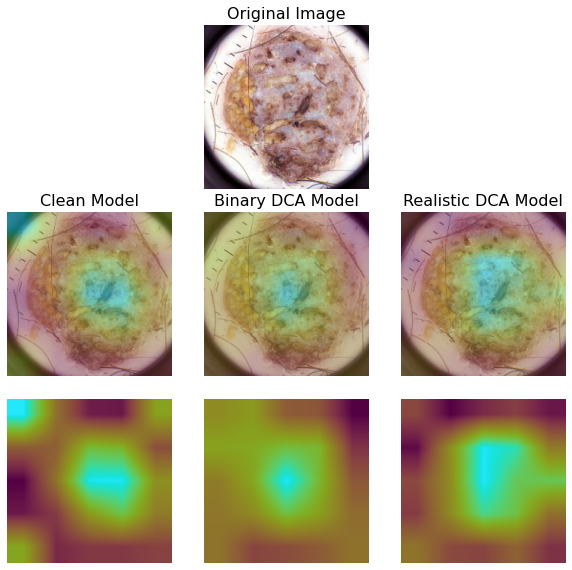

In [30]:
# SMALL
fig, axes = plt.subplots(3, 3, figsize = (10,10));

axes[0][1].imshow(small_image)
axes[0][1].set_title("Original Image", fontsize=16)

axes[1][0].set_title("Clean Model", fontsize=16);
axes[1][0].imshow(base_small_output);
axes[2][0].imshow(base_small_heatmap);


axes[1][1].set_title("Binary DCA Model", fontsize=16);
axes[1][1].imshow(bin_small_output);
axes[2][1].imshow(bin_small_heatmap);


axes[1][2].set_title("Realistic DCA Model", fontsize=16);
axes[1][2].imshow(real_small_output);
axes[2][2].imshow(real_small_heatmap);



for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

plt.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\COMPARISON\gradcam_small.png')

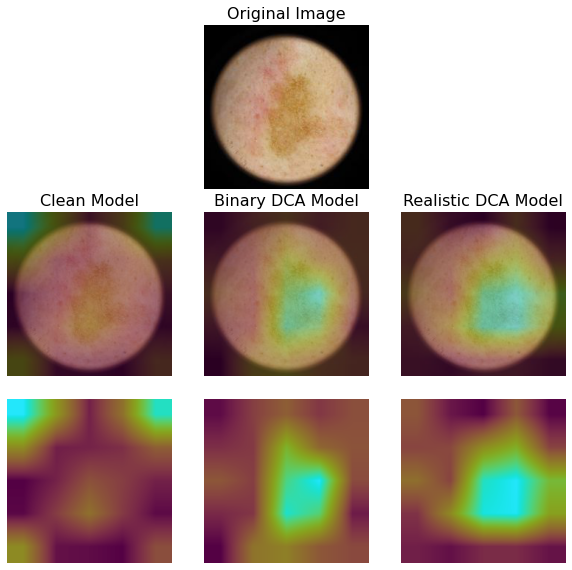

In [31]:
# MEDIUM
fig, axes = plt.subplots(3, 3, figsize = (10,10));

axes[0][1].imshow(medium_image)
axes[0][1].set_title("Original Image", fontsize=16)

axes[1][0].set_title("Clean Model", fontsize=16);
axes[1][0].imshow(base_medium_output);
axes[2][0].imshow(base_medium_heatmap);


axes[1][1].set_title("Binary DCA Model", fontsize=16);
axes[1][1].imshow(bin_medium_output);
axes[2][1].imshow(bin_medium_heatmap);


axes[1][2].set_title("Realistic DCA Model", fontsize=16);
axes[1][2].imshow(real_medium_output);
axes[2][2].imshow(real_medium_heatmap);



for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

plt.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\COMPARISON\gradcam_medium.png')

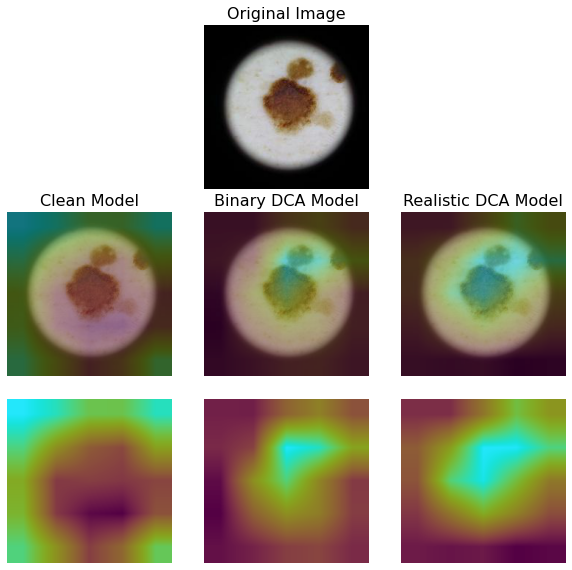

In [32]:
# LARGE
fig, axes = plt.subplots(3, 3, figsize = (10,10));

axes[0][1].imshow(large_image)
axes[0][1].set_title("Original Image", fontsize=16)

axes[1][0].set_title("Clean Model", fontsize=16);
axes[1][0].imshow(base_large_output);
axes[2][0].imshow(base_large_heatmap);


axes[1][1].set_title("Binary DCA Model", fontsize=16);
axes[1][1].imshow(bin_large_output);
axes[2][1].imshow(bin_large_heatmap);


axes[1][2].set_title("Realistic DCA Model", fontsize=16);
axes[1][2].imshow(real_large_output);
axes[2][2].imshow(real_large_heatmap);



for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

plt.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\COMPARISON\gradcam_large.png')

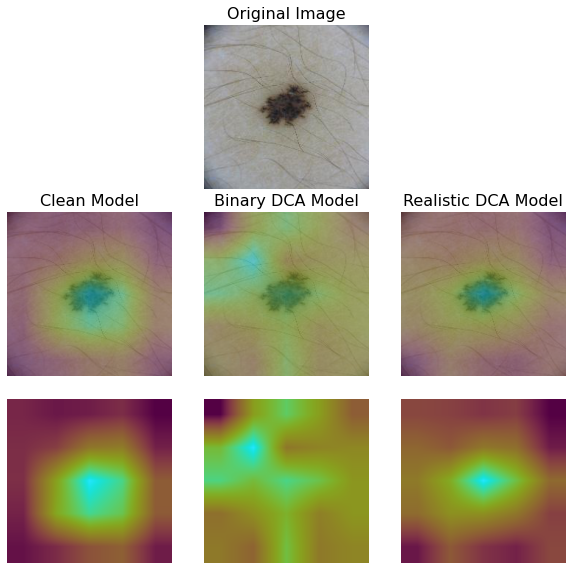

In [33]:
# OTH
fig, axes = plt.subplots(3, 3, figsize = (10,10));

axes[0][1].imshow(oth_image)
axes[0][1].set_title("Original Image", fontsize=16)

axes[1][0].set_title("Clean Model", fontsize=16);
axes[1][0].imshow(base_oth_output);
axes[2][0].imshow(base_oth_heatmap);


axes[1][1].set_title("Binary DCA Model", fontsize=16);
axes[1][1].imshow(bin_oth_output);
axes[2][1].imshow(bin_oth_heatmap);


axes[1][2].set_title("Realistic DCA Model", fontsize=16);
axes[1][2].imshow(real_oth_output);
axes[2][2].imshow(real_oth_heatmap);



for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

plt.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\COMPARISON\gradcam_oth.png')

In [13]:
#print(orig_i, ns_i)

In [14]:
#clean
#fig.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\clean\oth\gradcam_28_gt_oth_pred_oth.png')

#bin
#fig.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\dca_binary\oth\gradcam_28_gt_oth_pred_oth.png')

#real
#fig.savefig(r'C:\Users\Sam\Desktop\GradCAM Results\dca_realistic\oth\gradcam_28_gt_oth_pred_oth.png')